In [20]:
import numpy as np
import pandas as pd
import sklearn.tree
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, confusion_matrix, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras import losses, metrics, optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.metrics import AUC, Precision, Recall, F1Score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [21]:
dataX = [[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
         [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
         [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
         [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
         [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
         [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
         [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
         [0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
         [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0],
         [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
         [1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
         [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0],
         [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
         [1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
         [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
         [1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
         [1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
         [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
         [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
         [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
         [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
         [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1],
         [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
         [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
         [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
         [1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1],
         [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
         [1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0]]

dataY = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
df = pd.DataFrame(dataX)
df['y'] = dataY
df

,0,1,2,3,4,5,6,7,8,9,10,11,y
0,0,0,0,0,1,0,0,1,1,0,0,0,1
1,1,1,0,0,0,0,1,1,1,0,1,0,1
2,1,1,0,0,1,0,1,0,0,0,1,0,1
3,1,0,0,1,0,0,1,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,1
5,0,1,0,0,1,0,1,0,0,0,0,1,1
6,1,1,0,0,1,0,0,0,0,0,1,0,1
7,1,1,0,0,0,0,0,1,0,0,0,1,1
8,0,0,0,0,1,0,0,1,0,0,0,0,1
9,0,1,1,0,1,0,1,1,0,1,0,0,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], shuffle=True, test_size=0.2,
                                                    random_state=1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [27]:
model = Sequential([
    Input((1, X_train.shape[2])),
    Dense(units=8, activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy', AUC])
model.fit(X_train, y_train,
          epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3571 - auc_12: 0.6333 - loss: 0.6216
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3571 - auc_12: 0.7556 - loss: 0.5940
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.3571 - auc_12: 0.7528 - loss: 0.5706
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3571 - auc_12: 0.7500 - loss: 0.5478
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3571 - auc_12: 0.7444 - loss: 0.5271
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.3571 - auc_12: 0.7556 - loss: 0.5075
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3571 - auc_12: 0.7583 - loss: 0.4890
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3571 - auc_12: 0.7583 - loss: 0.4714
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3571 - auc_12: 0.7583 - loss: 0.4549
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.3571 - auc_12: 0.7694 - loss: 0.4388


In [30]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8750 - auc_12: 1.0000 - loss: 0.1715


ValueError: Unrecognized data type: x=[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1] (of type <class 'list'>)

In [41]:
X_test
model.predict(np.array([[[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


array([[[0.44437277]]], dtype=float32)

D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\

[Text(0.6, 0.875, 'x[3] <= 0.5\ngini = 0.408\nsamples = 21\nvalue = [6, 15]'),
 Text(0.4, 0.625, 'x[8] <= 0.5\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.375, 'x[1] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.4, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.8, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.8, 0.625, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]')]

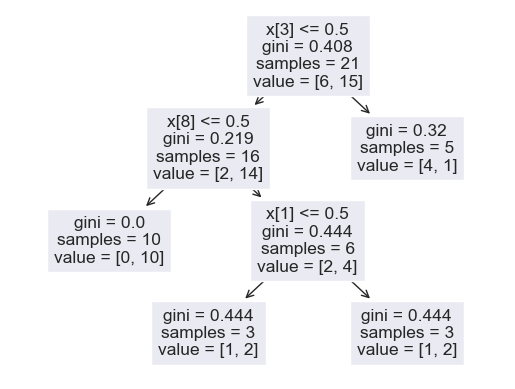

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], shuffle=True, test_size=0.4,
                                                    random_state=0)

estimator = DecisionTreeClassifier()
grid = GridSearchCV(estimator,
                    param_grid={'splitter': ['best', 'random'],
                                'criterion': ['gini', 'entropy', 'log_loss'],
                                'max_depth': range(4, 10),
                                'min_samples_leaf': range(1, 5),
                                'min_samples_split': range(1, 5)},
                    n_jobs=-1)
grid.fit(X_train, y_train)
best_tree = grid.best_estimator_

sklearn.tree.plot_tree(best_tree)

In [18]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

precision_score(y_test, y_preds)=0.7142857142857143
recall_score(y_test, y_preds)=0.8333333333333334
[[7 2]
 [1 5]]
[0.2        0.2        1.         1.         0.2        1.
 1.         1.         1.         0.2        0.2        0.2
 0.2        0.66666667 0.2       ]


<Figure size 640x480 with 0 Axes>

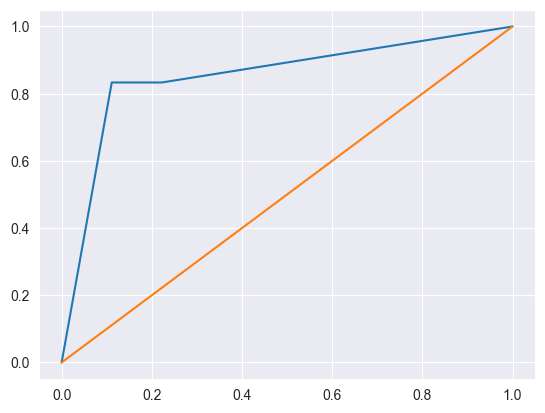

<Figure size 640x480 with 0 Axes>

In [106]:
y_probs = best_tree.predict_proba(X_test)[:, 1]
y_preds = best_tree.predict(X_test)
print(f'{precision_score(y_test, y_preds)=}')
print(f'{recall_score(y_test, y_preds)=}')

conf_matrix = confusion_matrix(y_test, y_preds)
print(confusion_matrix(y_test, y_preds))
print(y_probs)

ns_probs = [0 for _ in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
fpr, tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(fpr, tpr)

plt.figure()